# EDS 296 - Homework 1 - Time Series Analysis
Josephine Cardelle
Github Repository: https://github.com/jocardelle/eds296-HW1

### Import packages

In [35]:
# Import necessary packages
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import numpy as np

## Locate monthy data for a historical simulation run

In [3]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

# Search through catalog, find all historical simulations
res = catalog.search(activity_id="CMIP", experiment_id="historical")

# Convert to a data frame
res_df = res.df

# Get unique model names in the set of search results
models = res_df.source_id.unique()

# Print list of model names
print(models)

['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CNRM-ESM2-1' 'MIROC6' 'AWI-CM-1-1-MR'
 'MRI-ESM2-0' 'CESM2-WACCM' 'CanESM5' 'CESM2' 'SAM0-UNICON' 'GISS-E2-1-H'
 'UKESM1-0-LL' 'EC-Earth3' 'CanESM5-CanOE' 'INM-CM4-8' 'EC-Earth3-Veg'
 'INM-CM5-0' 'HadGEM3-GC31-LL' 'MPI-ESM-1-2-HAM' 'NESM3' 'CAMS-CSM1-0'
 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM'
 'GISS-E2-1-G-CC' 'FGOALS-g3' 'FGOALS-f3-L' 'MIROC-ES2L' 'KACE-1-0-G'
 'NorCPM1' 'CNRM-CM6-1-HR' 'KIOST-ESM' 'NorESM2-MM' 'ACCESS-CM2'
 'FIO-ESM-2-0' 'ACCESS-ESM1-5' 'CESM2-FV2' 'CESM2-WACCM-FV2' 'GISS-E2-2-H'
 'E3SM-1-1' 'HadGEM3-GC31-MM' 'IITM-ESM' 'CIESM' 'E3SM-1-1-ECA'
 'AWI-ESM-1-1-LR' 'EC-Earth3-Veg-LR' 'TaiESM1' 'CAS-ESM2-0' 'CMCC-CM2-SR5'
 'EC-Earth3-AerChem' 'IPSL-CM5A2-INCA' 'CMCC-CM2-HR4' 'EC-Earth3P-VHR'
 'EC-Earth3-CC' 'CMCC-ESM2' 'MIROC-ES2H' 'ICON-ESM-LR' 'IPSL-CM6A-LR-INCA']


In [10]:
# Search through catalog, find all historical simulations with CanESM5
res = catalog.search(activity_id="CMIP", experiment_id="historical", source_id="CESM2")
res2 = catalog.search(activity_id="CMIP", experiment_id="historical", source_id="CanESM5")

# Convert to a data frame
res_df = res.df
res_df2 = res2.df

# Print all unique ensemble members ("member_id")
members = res_df.member_id.unique()
members2 = res_df2.member_id.unique()

print(members)
print(members2)

['r4i1p1f1' 'r3i1p1f1' 'r2i1p1f1' 'r6i1p1f1' 'r5i1p1f1' 'r1i1p1f1'
 'r7i1p1f1' 'r9i1p1f1' 'r8i1p1f1' 'r10i1p1f1' 'r11i1p1f1']
['r24i1p1f1' 'r25i1p1f1' 'r14i1p1f1' 'r2i1p1f1' 'r17i1p1f1' 'r10i1p1f1'
 'r13i1p1f1' 'r7i1p1f1' 'r6i1p1f1' 'r5i1p1f1' 'r3i1p1f1' 'r22i1p1f1'
 'r23i1p1f1' 'r8i1p1f1' 'r11i1p1f1' 'r12i1p1f1' 'r15i1p1f1' 'r19i1p1f1'
 'r16i1p1f1' 'r1i1p1f1' 'r9i1p1f1' 'r18i1p1f1' 'r4i1p1f1' 'r21i1p1f1'
 'r20i1p1f1' 'r11i1p2f1' 'r10i1p2f1' 'r7i1p2f1' 'r9i1p2f1' 'r8i1p2f1'
 'r4i1p2f1' 'r40i1p2f1' 'r3i1p2f1' 'r6i1p2f1' 'r24i1p2f1' 'r13i1p2f1'
 'r12i1p2f1' 'r5i1p2f1' 'r31i1p2f1' 'r30i1p2f1' 'r32i1p2f1' 'r29i1p2f1'
 'r28i1p2f1' 'r2i1p2f1' 'r22i1p2f1' 'r23i1p2f1' 'r26i1p2f1' 'r27i1p2f1'
 'r25i1p2f1' 'r37i1p2f1' 'r38i1p2f1' 'r39i1p2f1' 'r35i1p2f1' 'r34i1p2f1'
 'r36i1p2f1' 'r33i1p2f1' 'r1i1p2f1' 'r18i1p2f1' 'r19i1p2f1' 'r14i1p2f1'
 'r15i1p2f1' 'r17i1p2f1' 'r16i1p2f1' 'r21i1p2f1' 'r20i1p2f1']


In [13]:
# activity_id: which project do you want? CMIP = historical data
activity_ids = ['CMIP'] 
activity_ids2 = ['CMIP'] 

# source_id: which model do you want? 
source_id = ['CESM2']
source_id2 = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical
experiment_ids = ['historical']
experiment_ids2 = ['historical']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = 'r10i1p1f1'
member_id2 = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon'
table_id2 = 'Amon'

# variable_id: which climate variables do you want? Here we want surface air temperature and precipitation
variable_ids = ['tas', 'pr']
variable_ids2 = ['tas', 'pr']

In [14]:
# Search through catalog, store results in "res" and "res2" variables
res = catalog.search(
    activity_id=activity_ids,
    source_id=source_id,
    experiment_id=experiment_ids,
    member_id=member_id,
    table_id=table_id,
    variable_id=variable_ids
)

res2 = catalog.search(
    activity_id=activity_ids2,
    source_id=source_id2,
    experiment_id=experiment_ids2,
    member_id=member_id2,
    table_id=table_id2,
    variable_id=variable_ids2
)

display(res.df)
display(res2.df)

hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})
hist_data2 = xr.open_zarr(res2.df['zstore'][0], storage_options={'anon': True})

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313
1,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20200124


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429


## Historical and Future Projections


In [16]:
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CESM2']
source_id2 = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = 'r10i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon'

# variable_id: which climate variables do you want? Here we want surface air temperature and precipitation
variable_ids = 'tas'
variable_ids2 = 'pr'

In [21]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_ids)
res2 = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids,
                      member_id = member_id, table_id = table_id, variable_id=variable_ids2)

res3 = res = catalog.search(activity_id=activity_ids, source_id=source_id2, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_ids)
res4 = catalog.search(activity_id=activity_ids, source_id=source_id2, experiment_id=experiment_ids,
                      member_id = member_id, table_id = table_id, variable_id=variable_ids2)

# Extract data for the historical period, store as a separate xarray Dataset
hist_data = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})

# Extract data for an SSP 
ssp370_data = xr.open_zarr(res.df['zstore'][2], storage_options={'anon': True})

# Extract data for the historical period, store as a separate xarray Dataset
hist_data2 = xr.open_zarr(res2.df['zstore'][0], storage_options={'anon': True})

# Extract data for an SSP 
ssp370_data2 = xr.open_zarr(res2.df['zstore'][2], storage_options={'anon': True})

# Extract data for the historical period, store as a separate xarray Dataset
hist_data3 = xr.open_zarr(res3.df['zstore'][0], storage_options={'anon': True})

# Extract data for an SSP 
ssp370_data3 = xr.open_zarr(res3.df['zstore'][2], storage_options={'anon': True})

# Extract data for the historical period, store as a separate xarray Dataset
hist_data4 = xr.open_zarr(res4.df['zstore'][0], storage_options={'anon': True})

# Extract data for an SSP 
ssp370_data4 = xr.open_zarr(res4.df['zstore'][2], storage_options={'anon': True})

## Analyze a region of interest (Northern Mariana Islands)
Describe, in markdown text, the climate of that region in general terms. What is it like? Is
it a forest, a desert, polar, tropical, urban, etc? What types of climate change impacts might
you expect there?


I am interesed in analyzing the Commonwealth of the Northern Mariana Islands(CNMI). These are tropical islands in the pacific ocean, just north of Guam. The have a very humid climate and are impacted by dry and rainy seasons. They also experience typhoons fairly often. I would expect them to be very effected by these typhoons, with the frequency increasing with climate change. I also expect them to experience rise in temperature.

In [23]:
# Concatenate historical and future projection data
cesm2_data = xr.concat([hist_data, ssp370_data], dim="time")
cesm2_data2 = xr.concat([hist_data2, ssp370_data2], dim="time")
canesm5_data = xr.concat([hist_data3, ssp370_data3], dim="time")
canesm5_data2 = xr.concat([hist_data4, ssp370_data4], dim="time")

# Convert time to datetime64 format
time = cesm2_data.time.astype('datetime64[ns]')
time2 = cesm2_data2.time.astype('datetime64[ns]')
time3 = canesm5_data.time.astype('datetime64[ns]')
time4 = canesm5_data2.time.astype('datetime64[ns]')

In [25]:
# Define min/max bounds for region of interest 
lat_min, lat_max = 14, 20
lon_min, lon_max = 145, 157

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_CNMI_lat_cesm = (cesm2_data.lat >= lat_min) & (cesm2_data.lat <= lat_max)
tas_CNMI_lon_cesm = (cesm2_data.lon >= lon_min) & (cesm2_data.lon <= lon_max)
pr_CNMI_lat_cesm = (cesm2_data2.lat >= lat_min) & (cesm2_data2.lat <= lat_max)
pr_CNMI_lon_cesm = (cesm2_data2.lon >= lon_min) & (cesm2_data2.lon <= lon_max)


tas_CNMI_lat_canesm = (canesm5_data.lat >= lat_min) & (canesm5_data.lat <= lat_max)
tas_CNMI_lon_canesm = (canesm5_data.lon >= lon_min) & (canesm5_data.lon <= lon_max)
pr_CNMI_lat_canesm = (canesm5_data2.lat >= lat_min) & (canesm5_data2.lat <= lat_max)
pr_CNMI_lon_canesm = (canesm5_data2.lon >= lon_min) & (canesm5_data2.lon <= lon_max)
# Find points where the mask value is True, drop all other points
tas_CNMI_cesm = cesm2_data.where(tas_CNMI_lat_cesm & tas_CNMI_lon_cesm, drop=True)
pr_CNMI_cesm = cesm2_data2.where(pr_CNMI_lat_cesm & pr_CNMI_lon_cesm, drop=True)

tas_CNMI_canesm = canesm5_data.where(tas_CNMI_lat_canesm & tas_CNMI_lon_canesm, drop=True)
pr_CNMI_canesm = canesm5_data2.where(pr_CNMI_lat_canesm & pr_CNMI_lon_canesm, drop=True)

# Average over lat, lon dimensions to get a time series
tas_CNMI_cesm = tas_CNMI_cesm.mean(dim=["lat", "lon"])
pr_CNMI_cesm = pr_CNMI_cesm.mean(dim=["lat", "lon"])

tas_CNMI_canesm = tas_CNMI_canesm.mean(dim=["lat", "lon"])
pr_CNMI_canesm = pr_CNMI_canesm.mean(dim=["lat", "lon"])

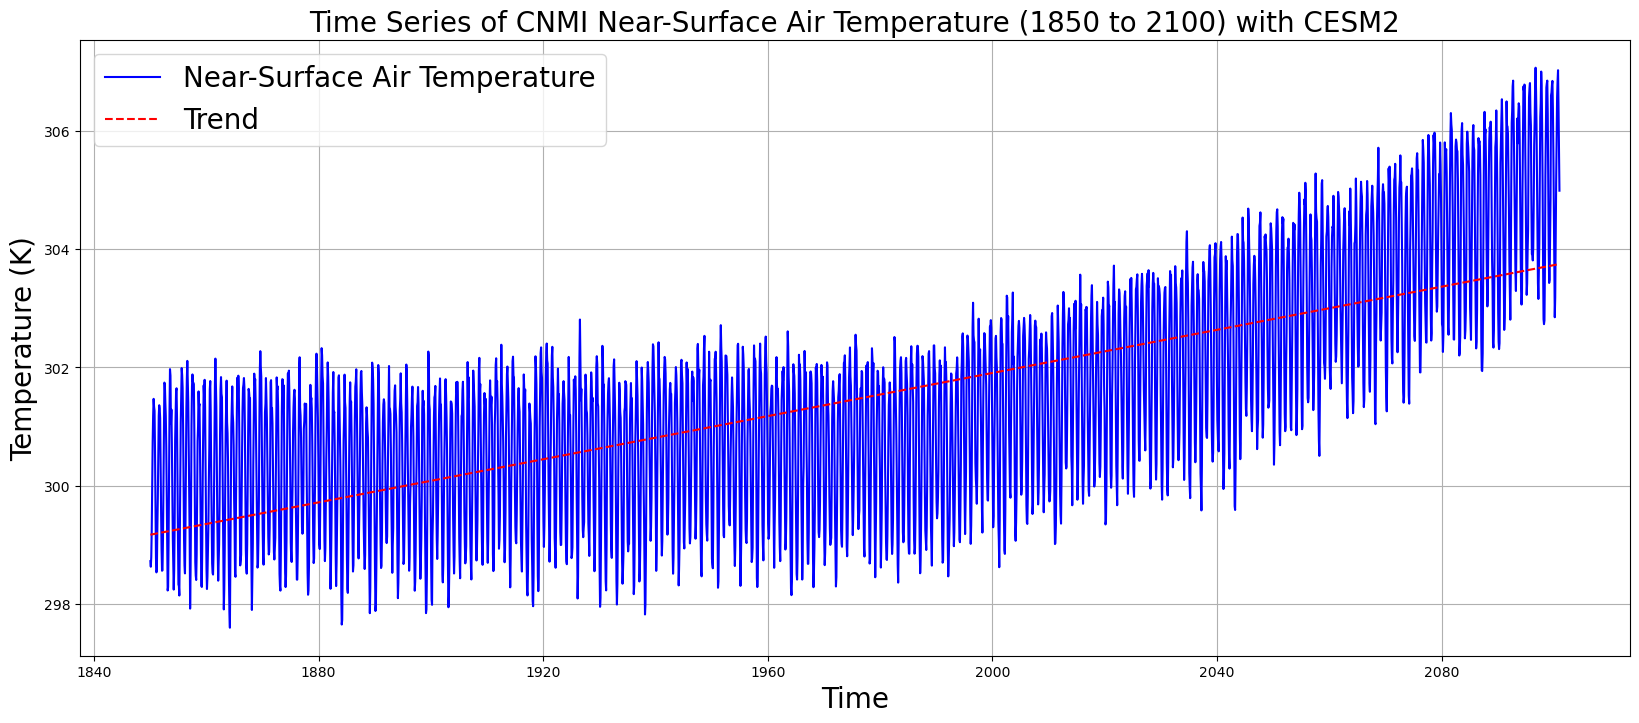

In [36]:
# Plot the first resulting time series
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_CNMI_cesm.tas, label='Near-Surface Air Temperature', color='b')
# Add a trend line
x = np.arange(len(time))
z = np.polyfit(x, tas_CNMI_cesm.tas, 1)
p = np.poly1d(z)
ax.plot(time, p(x), 'r--', label='Trend')

ax.set_title("Time Series of CNMI Near-Surface Air Temperature (1850 to 2100) with CESM2", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

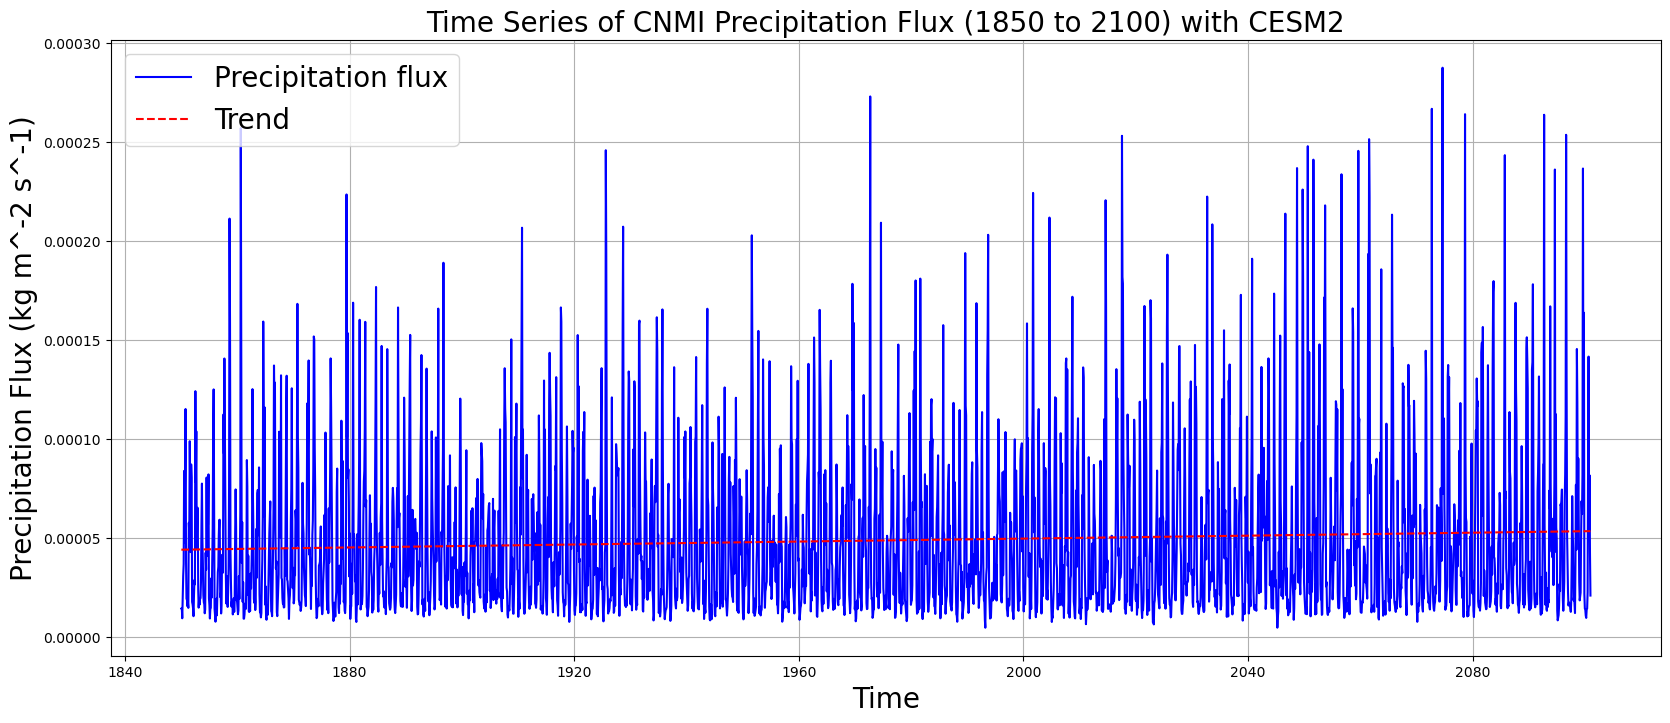

In [39]:
# Plot the second resulting time series
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, pr_CNMI_cesm.pr, label='Precipitation flux', color='b')
# Add a trend line
x = np.arange(len(time))
z = np.polyfit(x, pr_CNMI_cesm.pr, 1)
p = np.poly1d(z)
ax.plot(time, p(x), 'r--', label='Trend')

ax.set_title("Time Series of CNMI Precipitation Flux (1850 to 2100) with CESM2", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Precipitation Flux (kg m^-2 s^-1)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

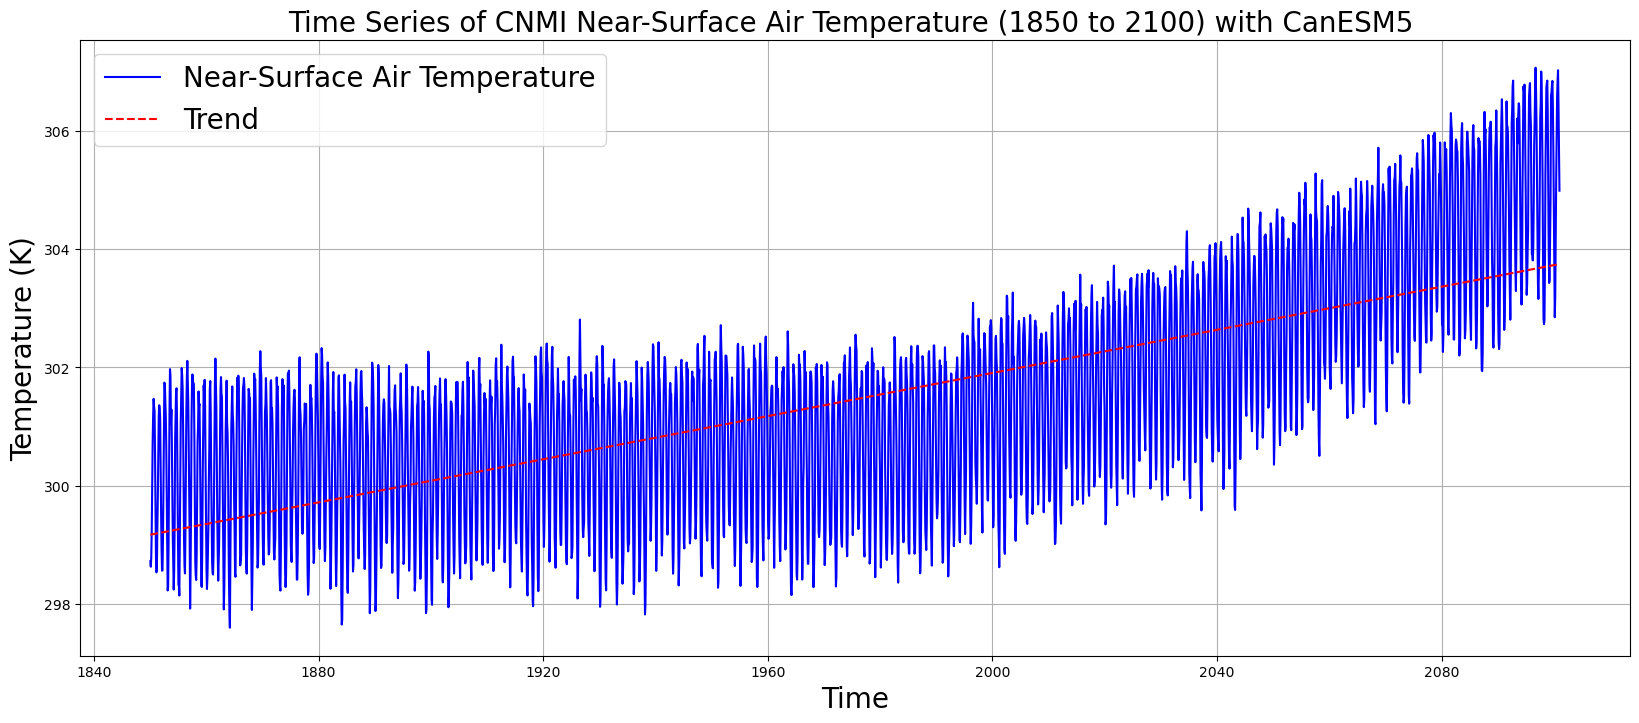

In [40]:
# Plot the third resulting time series
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_CNMI_canesm.tas, label='Near-Surface Air Temperature', color='b')
# Add a trend line
x = np.arange(len(time))
z = np.polyfit(x, tas_CNMI_canesm.tas, 1)
p = np.poly1d(z)
ax.plot(time, p(x), 'r--', label='Trend')
ax.set_title("Time Series of CNMI Near-Surface Air Temperature (1850 to 2100) with CanESM5 ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

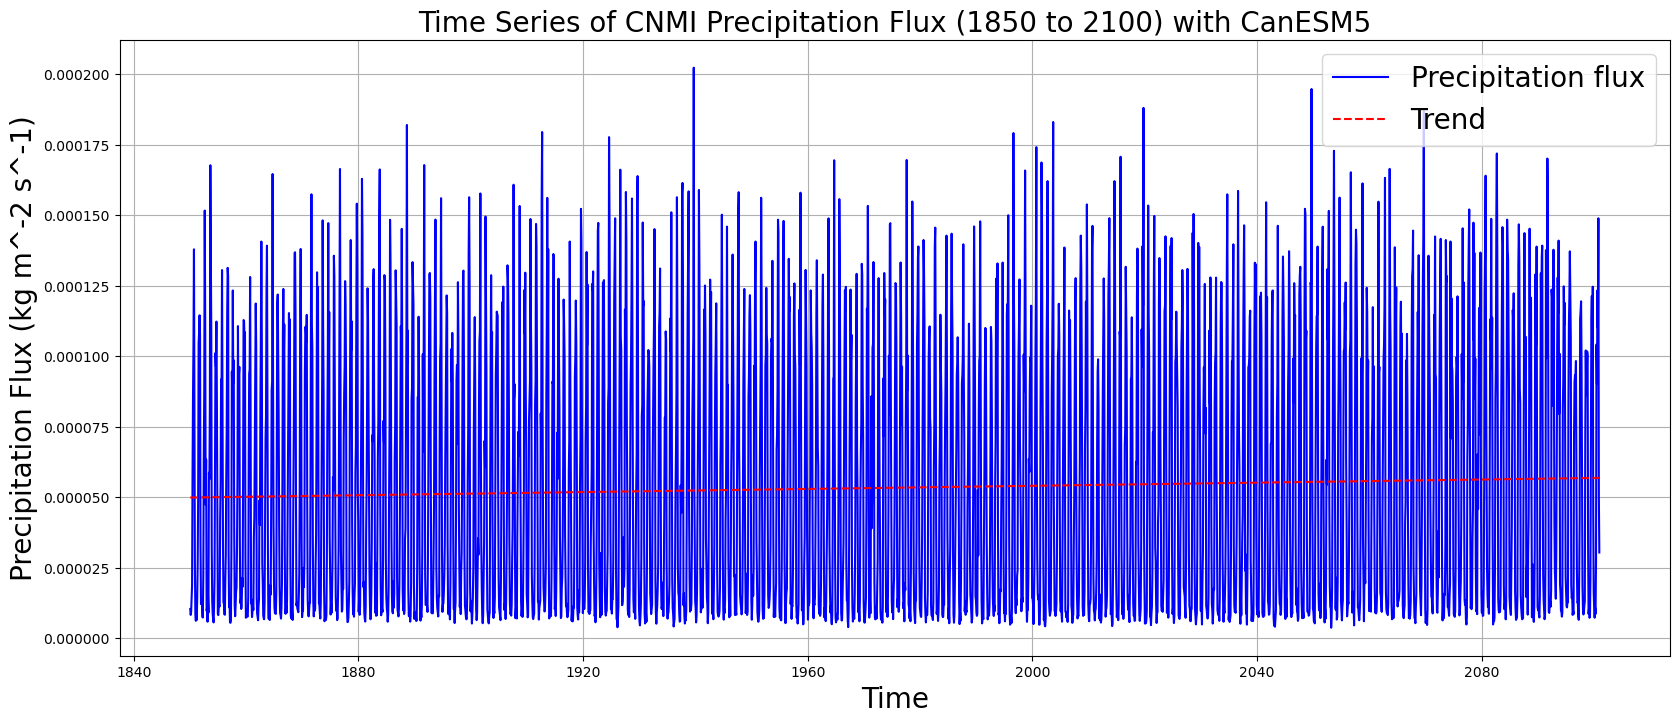

In [41]:
# Plot the fourth resulting time series
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, pr_CNMI_canesm.pr, label='Precipitation flux', color='b')
# Add a trend line
x = np.arange(len(time))
z = np.polyfit(x, pr_CNMI_canesm.pr, 1)
p = np.poly1d(z)
ax.plot(time, p(x), 'r--', label='Trend')
ax.set_title("Time Series of CNMI Precipitation Flux (1850 to 2100) with CanESM5", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Precipitation Flux (kg m^-2 s^-1)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

## Results

My time series analysis shows a clear warming trend in the CNMI region. Both the CESM2 and CanESM5 models show very similar temperature patterns. I noticed that from 1850 until about 1980, temperatures stayed pretty stable around 300K (27°C), but after 1980, temperatures started increasing noticeably, and this warming accelerates dramatically after 2020. By 2100, both models project temperatures will rise by about 6-7K, reaching around 307K (34°C). The fact that both models show such similar results makes me confident that this warming trend is statistically significant. For precipitation, I didn't see any clear trend, just a lot of fluxtuation.

These temperature changes will seriously impact the CNMI's ecosystems and communities. The coral reefs that surround the islands will likely experience more frequent and severe bleaching events as water temperatures rise, threatening marine biodiversity and the fishing industry that locals depend on. People will face increased health risks from extreme heat, higher energy costs for cooling, and potential decreases in crop yields. While precipitation doesn't show a clear decreasing trend, the higher temperatures will cause more evaporation, which could still create water stress issues. Rising ocean temperatures might also lead to stronger typhoons hitting the islands, and the sea level rise that comes with global warming (though not shown in my plots) will threaten coastal areas with erosion and saltwater intrusion into freshwater sources.